This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

1. CUST_ID : Identification of Credit Card holder (Categorical)

2. BALANCE : Balance amount left in their account to make purchases (

3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4. PURCHASES : Amount of purchases made from account

5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go

6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment

7. CASH_ADVANCE : Cash in advance given by the user

8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9. ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10. PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11. CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid

12. CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"

13. PURCHASES_TRX : Numbe of purchase transactions made

14. CREDIT_LIMIT : Limit of Credit Card for user

15. PAYMENTS : Amount of Payment done by user

16. MINIMUM_PAYMENTS : Minimum amount of payments made by user

17. PRC_FULL_PAYMENT : Percent of full payment paid by user

18. TENURE : Tenure of credit card service for user

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')

np.random.seed(42)
print('Libraries have been imported')

Libraries have been imported


# Step-1: Gathering Data

In [2]:
data=pd.read_csv('data\Dataset.csv')
df=data.copy()
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [11]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(df.shape))
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Shape of data: (8950, 18)
Number of rows: 8950
Number of columns: 18


# Step-2: Data preprocessing

In [ ]:
# Checking the number of  null values
df.isnull().sum().sort_values(ascending=False)

In [ ]:
# Counting the number of distinct elements.
df.nunique().sort_values(ascending=False)

In [ ]:
# printing information about the DataFrame.
df.info()

In [17]:
# Removing duplicate rows return the DataFrame.
df.drop_duplicates(inplace=True)

    |  Droped unnecessary columns

In [3]:
# Unnecessary columns are omitted.
df.drop(columns=['CUST_ID'], inplace=True)

    | Imputing missing values

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [6]:
# The KNNImputer class instance is fitted and all missing values are imputed.
Imputed_np = imputer.fit_transform(df)

# numpy.ndarray is moved back to dataFrame
Imputed_df = pd.DataFrame(Imputed_np, columns=df.columns, dtype=np.float32)
Imputed_df.sample(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7669   16.834929           0.454545   15.00000         15.000000   
6125  540.020874           1.000000  612.22998        495.609985   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7669                0.000000    209.025391             0.090909   
6125              116.620003   1708.923218             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7669                    0.090909                               0.0   
6125                    0.166667                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7669                0.090909               1.0            1.0        7500.0   
6125                0.333333              10.0           10.0        2000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
7669   430.213013         86.959785               0.0    11.0  
6125  1642.068726        419.956238               0.0    12.0

In [ ]:
# Checking the number of  null values
Imputed_df.isnull().sum()

In [ ]:
# printing information about the DataFrame
Imputed_df.info()

# Step-3: Exploratory Data Analysis (EDA)

In [ ]:
# Generated descriptive statistics.
Imputed_df.describe().T

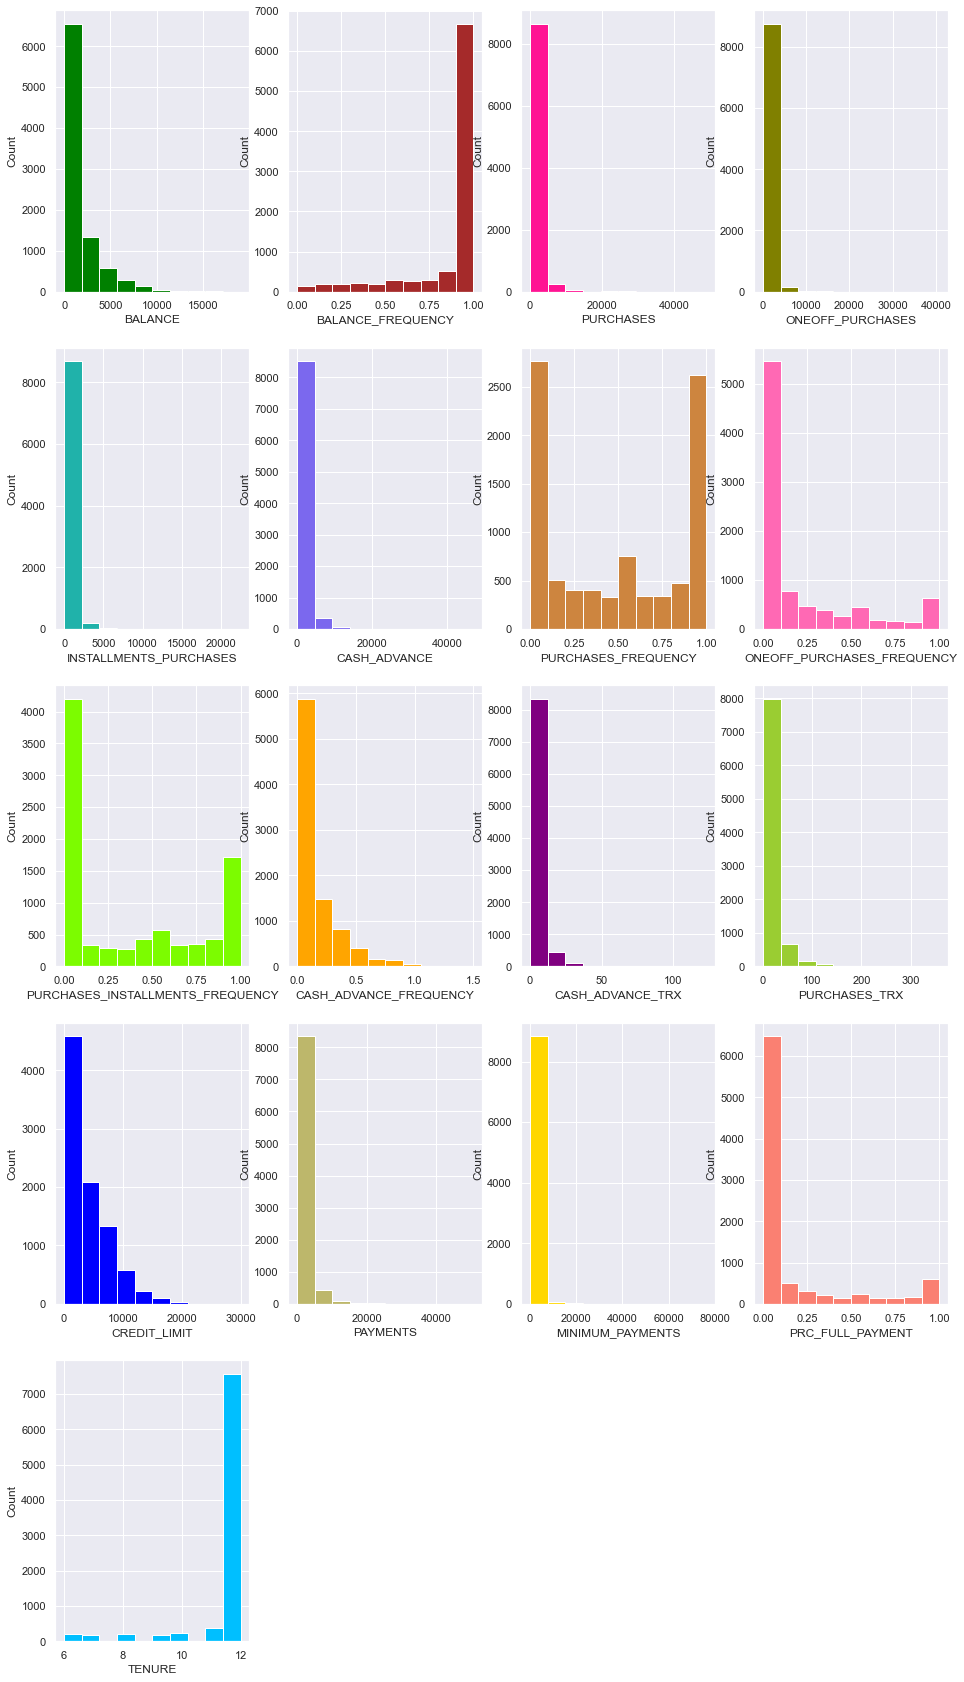

In [17]:
colors=['Green','Brown','DeepPink','Olive','LightSeaGreen','MediumSlateBlue','Peru','HotPink','LawnGreen','orange','Purple','YellowGreen','Blue','DarkKhaki','Gold','Salmon','DeepSkyBlue']
plt.figure(figsize=(16,30))

for col_name,color,plot in zip(Imputed_df.columns,colors,range(1,18)):
    plt.subplot(5,4,plot)
    sns.set(style='dark')
    plt.hist(Imputed_df[col_name], color=color)
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.grid()
plt.show()

<AxesSubplot:>

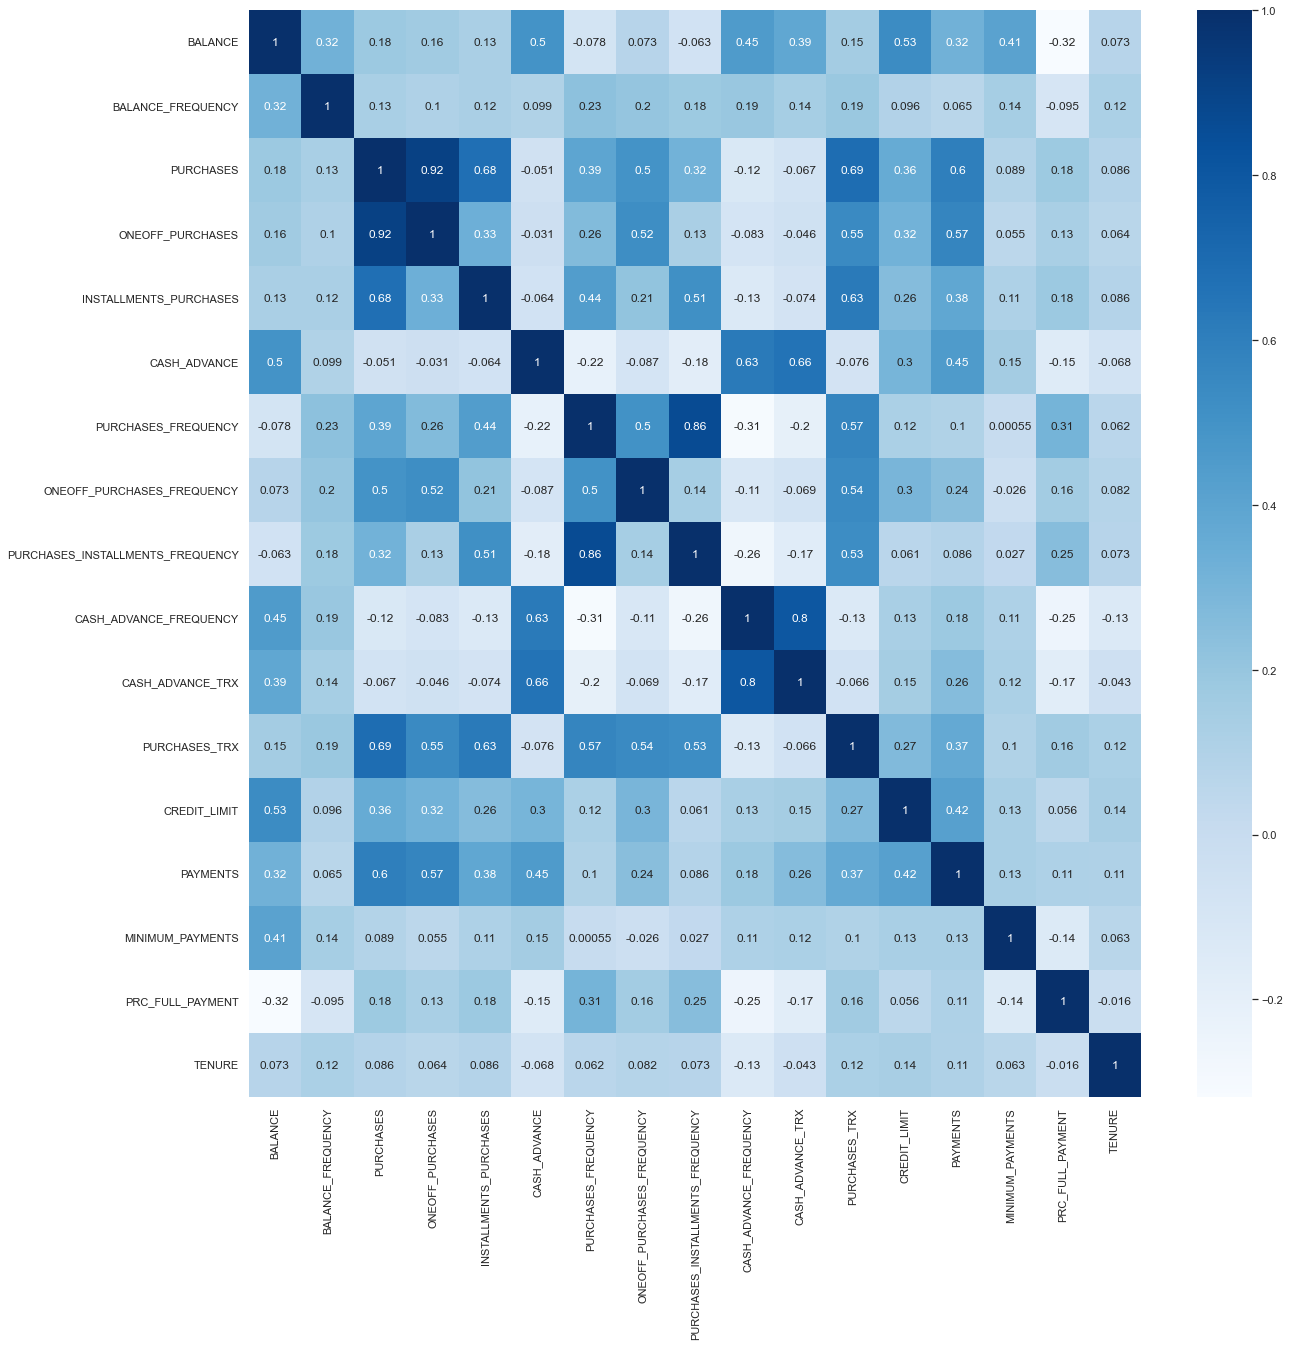

In [32]:
# Checking the correlation
correlation=Imputed_df.corr()
plt.figure(figsize=(20,20))
sns.set(style='dark')
sns.heatmap(correlation, annot=True, cmap='Blues')

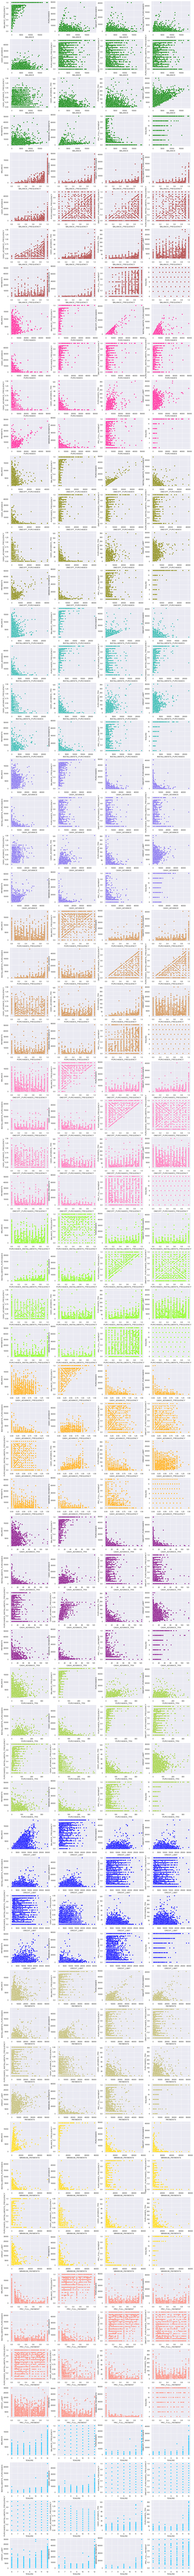

In [27]:
colors=['Green','Brown','DeepPink','Olive','LightSeaGreen','MediumSlateBlue','Peru','HotPink','LawnGreen','orange','Purple','YellowGreen','Blue','DarkKhaki','Gold','Salmon','DeepSkyBlue']
plot=1
plt.figure(figsize=(20,300))
for col_name_1 , color in zip (Imputed_df.columns,colors):
    for col_name_2 in (Imputed_df.columns):
        if col_name_1==col_name_2:
            continue
        plt.subplot(70,4,plot)
        sns.set(style='dark')
        sns.scatterplot(x=Imputed_df[col_name_1],y=Imputed_df[col_name_2],color=color)
        plt.xlabel(col_name_1)
        plt.ylabel(col_name_2)
        plt.grid()
        plot+=1
plt.show()


    | Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled_data=scaler.fit_transform(Imputed_df)
scaled_data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

1. CUST_ID : Identification of Credit Card holder (Categorical)

2. BALANCE : Balance amount left in their account to make purchases (

3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4. PURCHASES : Amount of purchases made from account

5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go

6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment

7. CASH_ADVANCE : Cash in advance given by the user

8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9. ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10. PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11. CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid

12. CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"

13. PURCHASES_TRX : Numbe of purchase transactions made

14. CREDIT_LIMIT : Limit of Credit Card for user

15. PAYMENTS : Amount of Payment done by user

16. MINIMUM_PAYMENTS : Minimum amount of payments made by user

17. PRC_FULL_PAYMENT : Percent of full payment paid by user

18. TENURE : Tenure of credit card service for user